# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect_langs, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from collections import Counter

# LOADING DATASET

## ROTTEN TOMATOES MOVIES

In [2]:
df1 = pd.read_csv("rotten_tomatoes_movies.csv")
df1

,id,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,25-08-2018,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,11-02-2020,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,23-10-2020,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,27-03-2017,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,NaN,NaN,27-08-2002,NaN,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,NaN,ADV Films,NaN
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Andrew Behringer,Erika Heidewald,NaN,NaN,NaN
143255,the-human-body,The Human Body,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,NaN,NaN
143256,flying_fists,Flying Fists,NaN,NaN,NaN,NaN,21-11-2006,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",NaN,NaN,NaN


## ROTTEN TOMATOES MOVIE REVIEWS

In [3]:
df2 = pd.read_csv("rotten_tomatoes_movie_reviews.csv")
df2

,id,reviewId,creationDate,originalScore,reviewState,reviewText,scoreSentiment
0,beavers,1145982,23-05-2003,3.5/4,fresh,Timed to be just long enough for most youngste...,POSITIVE
1,blood_mask,1636744,02-06-2007,01-May,rotten,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,city_hunter_shinjuku_private_eyes,2590987,28-05-2019,NaN,fresh,The choreography is so precise and lifelike at...,POSITIVE
3,city_hunter_shinjuku_private_eyes,2558908,14-02-2019,2.5/5,rotten,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,dangerous_men_2015,2504681,29-08-2018,NaN,fresh,Its clumsy determination is endearing and some...,POSITIVE
...,...,...,...,...,...,...,...
1048570,gunpowder_milkshake,2806168,16-07-2021,03-May,fresh,"Casting and experience always pay dividends, a...",POSITIVE
1048571,gunpowder_milkshake,2806152,16-07-2021,NaN,rotten,It's carried off with a kind of winking detach...,NEGATIVE
1048572,gunpowder_milkshake,2806108,16-07-2021,03-May,fresh,"As stylish as it is, it's kind of learnt the w...",POSITIVE
1048573,gunpowder_milkshake,2806104,16-07-2021,B+,fresh,The highly-stylized action comedy doesn't take...,POSITIVE


# DATA MERGING

In [4]:
df = pd.merge(df1, df2, on='id', how='inner')

# LOADING FINAL DATASET

## ROTTEN TOMATOES MOVIE REVIEWS WITH MOVIE TITLES

In [5]:
df.to_csv('rotten_tomatoes_movie_reviews_data_final.csv', index=False)
df

,id,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,...,writer,boxOffice,distributor,soundMix,reviewId,creationDate,originalScore,reviewState,reviewText,scoreSentiment
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,...,"Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN,2739073,31-10-2020,04-May,fresh,Though let down by its routine love triangle n...,POSITIVE
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,...,"Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN,2333658,15-06-2016,3.5/5,fresh,"While not perfect, Love, Lies is a worthy disc...",POSITIVE
2,adrift_2018,Adrift,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",01-06-2018,21-08-2018,120.0,"Adventure, Drama, Romance",English,...,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN,102694850,29-05-2022,06-Oct,fresh,This is nowhere near the level of other great ...,POSITIVE
3,adrift_2018,Adrift,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",01-06-2018,21-08-2018,120.0,"Adventure, Drama, Romance",English,...,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN,102654799,11-02-2022,NaN,fresh,"Adrift somehow survives the late reveal, and t...",POSITIVE
4,adrift_2018,Adrift,65.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",01-06-2018,21-08-2018,120.0,"Adventure, Drama, Romance",English,...,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN,2816011,21-08-2021,C+,rotten,"For almost the entire runtime, the only people...",NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060206,crna_macka_beli_macor,"Crna macka, beli macor",95.0,NaN,NaN,10-09-1998,02-11-2017,129.0,Comedy,German,...,"Emir Kusturica,Gordan Mihic",$348.7K,USA Films,"Dolby SR, Surround",123278,01-01-2000,03-May,fresh,"Black Cat, White Cat is not an example of Kust...",POSITIVE
1060207,crna_macka_beli_macor,"Crna macka, beli macor",95.0,NaN,NaN,10-09-1998,02-11-2017,129.0,Comedy,German,...,"Emir Kusturica,Gordan Mihic",$348.7K,USA Films,"Dolby SR, Surround",123259,01-01-2000,08-Oct,fresh,You're in for a treat.,POSITIVE
1060208,crna_macka_beli_macor,"Crna macka, beli macor",95.0,NaN,NaN,10-09-1998,02-11-2017,129.0,Comedy,German,...,"Emir Kusturica,Gordan Mihic",$348.7K,USA Films,"Dolby SR, Surround",123263,01-01-2000,70/100,fresh,NaN,POSITIVE
1060209,crna_macka_beli_macor,"Crna macka, beli macor",95.0,NaN,NaN,10-09-1998,02-11-2017,129.0,Comedy,German,...,"Emir Kusturica,Gordan Mihic",$348.7K,USA Films,"Dolby SR, Surround",123264,01-01-2000,NaN,rotten,Lacking the emotionally charged metaphors that...,NEGATIVE


# DATA CLEANING

## DROPPING UNNECESSARY COLUMNS

In [6]:
df = df.copy()  
df.drop(columns=['rating', 'ratingContents', 'soundMix', 'distributor', 'writer', 'director', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'boxOffice', 'originalScore'], inplace=True)

## HANDLING MISSING VALUES

### CHECKING FOR MISSING VALUES

In [7]:
df.isnull().sum()

id                      0
title                2612
audienceScore       49510
genre               15250
originalLanguage    19681
reviewId                0
creationDate            0
reviewState             0
reviewText          50776
scoreSentiment          0
dtype: int64

### FILLING MISSING TITLES WITH CORRESPONDING ID VALUES

In [8]:
df['title'] = df['title'].fillna(df['id'])

### DETECTING AND FILLING LANGUAGES

In [9]:
def detect_language(text):
    try:
        languages = detect_langs(text)
        if len(languages) > 1 or languages[0].prob < 0.9:
            return 'Unknown'
        return languages[0].lang
    except LangDetectException:
        return 'Unknown'
        
df['originalLanguage'] = df.apply(
    lambda row: detect_language(row['title']) if pd.isnull(row['originalLanguage']) else row['originalLanguage'],
    axis=1
)

### FILLING MISSING VALUES IN GENRE COLUMN WITH 'UNKNOWN'

In [10]:
df['genre'] = df['genre'].fillna('Unknown')

### REMOVING MISSING VALUES FROM REVIEW TEXT COLUMN

In [11]:
df.dropna(subset=['reviewText'], inplace=True)

### REMOVING MISSING VALUES FROM AUDIENCE SCORE COLUMN

In [12]:
df.dropna(subset=['audienceScore'], inplace=True)

## HANDLING FOR DUPLICATE VALUES

### CHECKING FOR DUPLICATE VALUES

In [13]:
df.duplicated().sum()

16218

### DROPPING COLUMNS WITH DUPLICATE VALUES

In [14]:
df.drop_duplicates(inplace=True)

## ASSIGNING COLUMN ORDER

In [15]:
preferred_column_order = ['id', 'title', 'originalLanguage', 'genre', 'audienceScore', 'reviewId',
       'creationDate', 'reviewState', 'reviewText', 'scoreSentiment']
df = df[preferred_column_order]

## DATATYPE CONVERSION

In [16]:
df.dtypes

id                   object
title                object
originalLanguage     object
genre                object
audienceScore       float64
reviewId              int64
creationDate         object
reviewState          object
reviewText           object
scoreSentiment       object
dtype: object

In [17]:
object_columns = ['genre', 'originalLanguage', 'reviewState', 'scoreSentiment']

df[object_columns] = df[object_columns].astype('category')

## OUTLIERS DETECTION AND TREATMENT

### OUTLIERS DETECTION

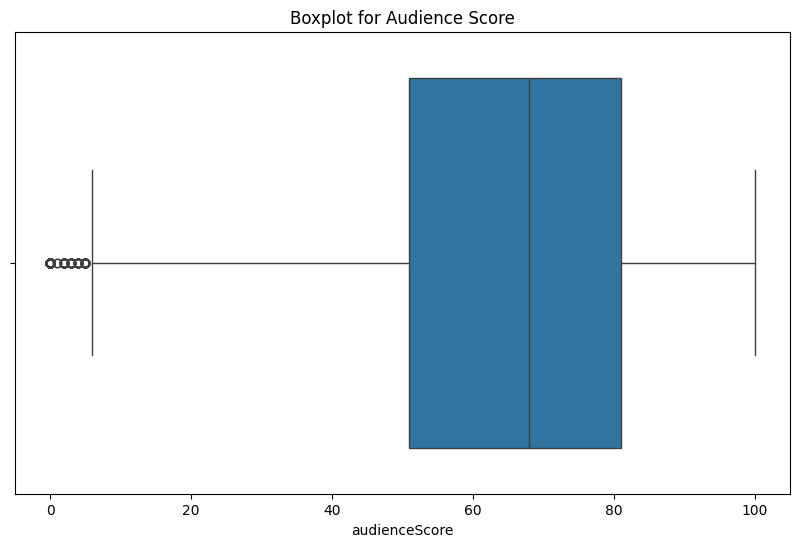

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['audienceScore'])
plt.title('Boxplot for Audience Score')
plt.show()

### REMOVING OUTLIERS

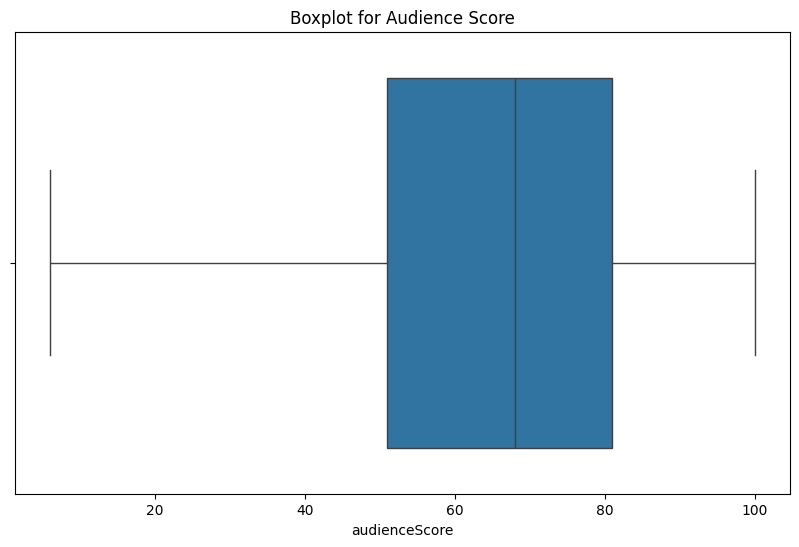

In [19]:
Q1 = df['audienceScore'].quantile(0.25)
Q3 = df['audienceScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['audienceScore'] < lower_bound) | (df['audienceScore'] > upper_bound)]
df = df[(df['audienceScore'] >= lower_bound) & (df['audienceScore'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['audienceScore'])
plt.title('Boxplot for Audience Score')
plt.show()

## TEXTUAL DATA CLEANING

In [20]:
df['reviewText'] = df['reviewText'].str.lower()

In [21]:
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)  
df['reviewText'] = df['reviewText'].str.replace(r'\d+', '', regex=True) 

In [22]:
stop = set(stopwords.words('english'))

df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [23]:
df['reviewText'] = df['reviewText'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

df['reviewText'] = df['reviewText'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [24]:
df['reviewText'] = df['reviewText'].str.strip()
df['reviewText'] = df['reviewText'].str.replace(r'\s+', ' ', regex=True) 

In [25]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F700-\U0001F77F"  
        u"\U0001F780-\U0001F7FF"  
        u"\U0001F800-\U0001F8FF"  
        u"\U0001F900-\U0001F9FF"  
        u"\U0001FA00-\U0001FA6F"  
        u"\U0001FA70-\U0001FAFF"  
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['reviewText'] = df['reviewText'].apply(remove_emojis)

In [26]:
lemmatizer = WordNetLemmatizer()

df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [27]:
word_counts = Counter(' '.join(df['reviewText']).split())
rare_words = {word for word, count in word_counts.items() if count < 3} 

df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))

# DATA EXPLORATION

## DISPLAYING THE DATASET

In [28]:
df

,id,title,originalLanguage,genre,audienceScore,reviewId,creationDate,reviewState,reviewText,scoreSentiment
0,love_lies,"Love, Lies",Korean,Drama,43.0,2739073,31-10-2020,fresh,though let routine love triangle narrative lov...,POSITIVE
1,love_lies,"Love, Lies",Korean,Drama,43.0,2333658,15-06-2016,fresh,perfect love lie worthy discovery time culture...,POSITIVE
2,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,102694850,29-05-2022,fresh,nowhere near level great survival story enough...,POSITIVE
3,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,102654799,11-02-2022,fresh,adrift somehow survives late reveal awkward st...,POSITIVE
4,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,2816011,21-08-2021,rotten,almost entire runtime people onscreen woodley ...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...
1060205,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123273,01-01-2000,fresh,highly recommended splendid time guaranteed,POSITIVE
1060206,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123278,01-01-2000,fresh,black cat white cat example kusturica working ...,POSITIVE
1060207,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123259,01-01-2000,fresh,youre treat,POSITIVE
1060209,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123264,01-01-2000,rotten,lacking emotionally charged metaphor made unde...,NEGATIVE


In [29]:
df.head(5)

,id,title,originalLanguage,genre,audienceScore,reviewId,creationDate,reviewState,reviewText,scoreSentiment
0,love_lies,"Love, Lies",Korean,Drama,43.0,2739073,31-10-2020,fresh,though let routine love triangle narrative lov...,POSITIVE
1,love_lies,"Love, Lies",Korean,Drama,43.0,2333658,15-06-2016,fresh,perfect love lie worthy discovery time culture...,POSITIVE
2,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,102694850,29-05-2022,fresh,nowhere near level great survival story enough...,POSITIVE
3,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,102654799,11-02-2022,fresh,adrift somehow survives late reveal awkward st...,POSITIVE
4,adrift_2018,Adrift,English,"Adventure, Drama, Romance",65.0,2816011,21-08-2021,rotten,almost entire runtime people onscreen woodley ...,NEGATIVE


In [30]:
df.tail(5)

,id,title,originalLanguage,genre,audienceScore,reviewId,creationDate,reviewState,reviewText,scoreSentiment
1060205,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123273,01-01-2000,fresh,highly recommended splendid time guaranteed,POSITIVE
1060206,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123278,01-01-2000,fresh,black cat white cat example kusturica working ...,POSITIVE
1060207,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123259,01-01-2000,fresh,youre treat,POSITIVE
1060209,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123264,01-01-2000,rotten,lacking emotionally charged metaphor made unde...,NEGATIVE
1060210,crna_macka_beli_macor,"Crna macka, beli macor",German,Comedy,95.0,123249,01-01-2000,fresh,there nothing cynical coldhearted black cat wh...,POSITIVE


## SHAPE OF THE DATASET

In [31]:
df.shape

(944285, 10)

## STRUCTURE OF THE DATASET

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944285 entries, 0 to 1060210
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                944285 non-null  object  
 1   title             944285 non-null  object  
 2   originalLanguage  944285 non-null  category
 3   genre             944285 non-null  category
 4   audienceScore     944285 non-null  float64 
 5   reviewId          944285 non-null  int64   
 6   creationDate      944285 non-null  object  
 7   reviewState       944285 non-null  category
 8   reviewText        944285 non-null  object  
 9   scoreSentiment    944285 non-null  category
dtypes: category(4), float64(1), int64(1), object(4)
memory usage: 55.9+ MB


In [33]:
df.columns

Index(['id', 'title', 'originalLanguage', 'genre', 'audienceScore', 'reviewId',
       'creationDate', 'reviewState', 'reviewText', 'scoreSentiment'],
      dtype='object')

## SENTIMENT SCORE COUNT

In [34]:
df['scoreSentiment'].value_counts()

scoreSentiment
POSITIVE    629929
NEGATIVE    314356
Name: count, dtype: int64

# DATA VISUALIZATION

## COUNT PLOT DEPICTING SENTIMENT DISTRIBUTION

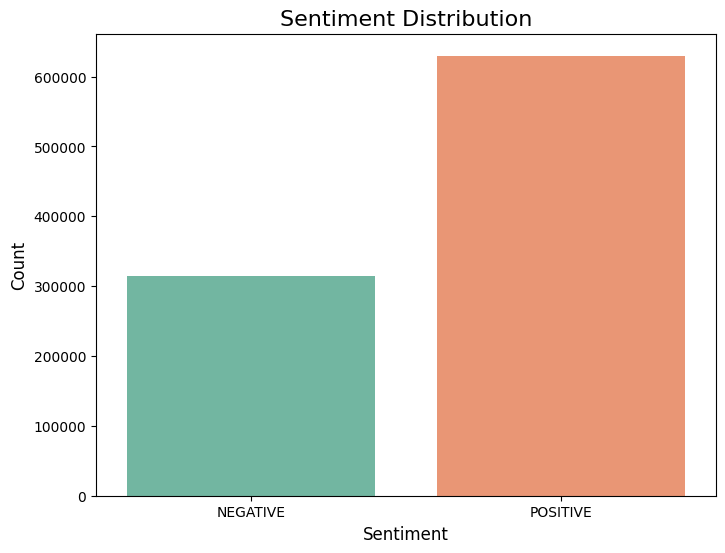

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='scoreSentiment', hue='scoreSentiment', data=df, palette='Set2', legend=False)

plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

## COUNT PLOT DEPICTING SENTIMENT DISTRIBUTION BY AUDIENCE SCORE

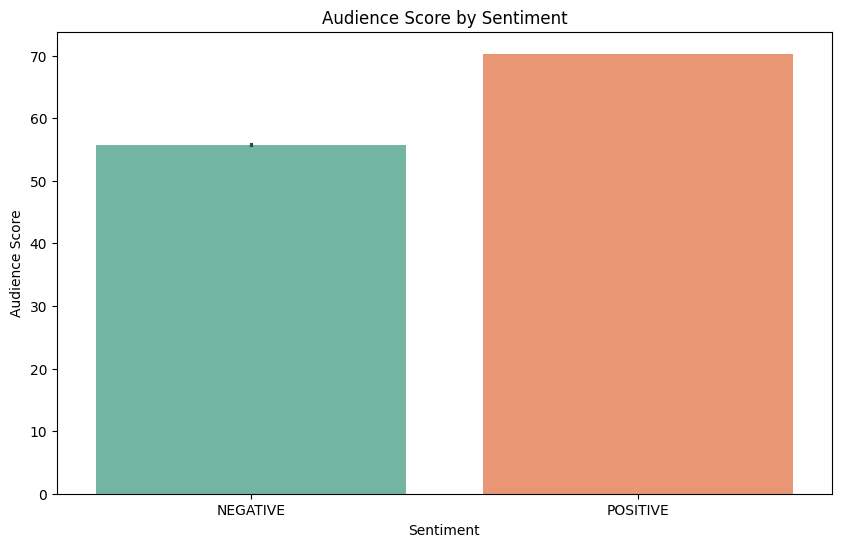

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='scoreSentiment', y='audienceScore', data=df, hue='scoreSentiment', palette='Set2', legend=False)
plt.title('Audience Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.show()

## WORD CLOUD VISUALIZATION OF POSITIVE AND NEGATIVE REVIEW OF MOVIES

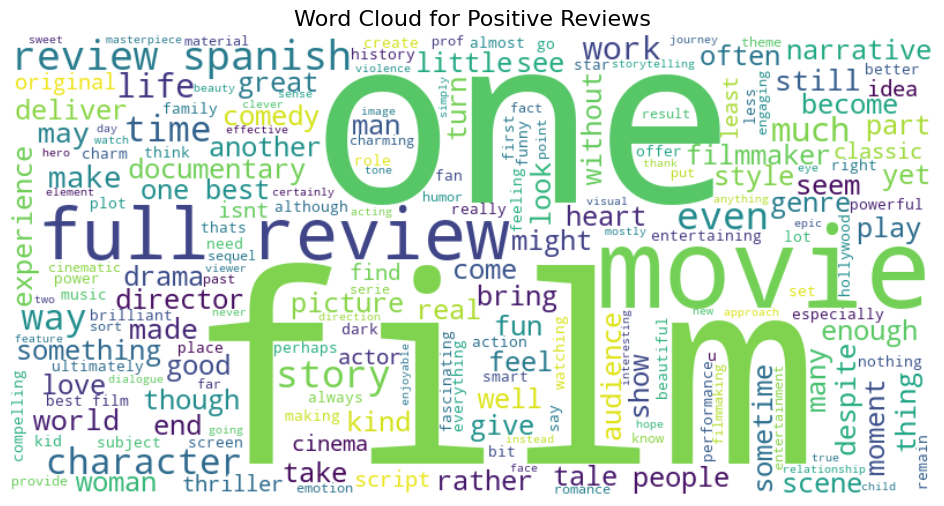

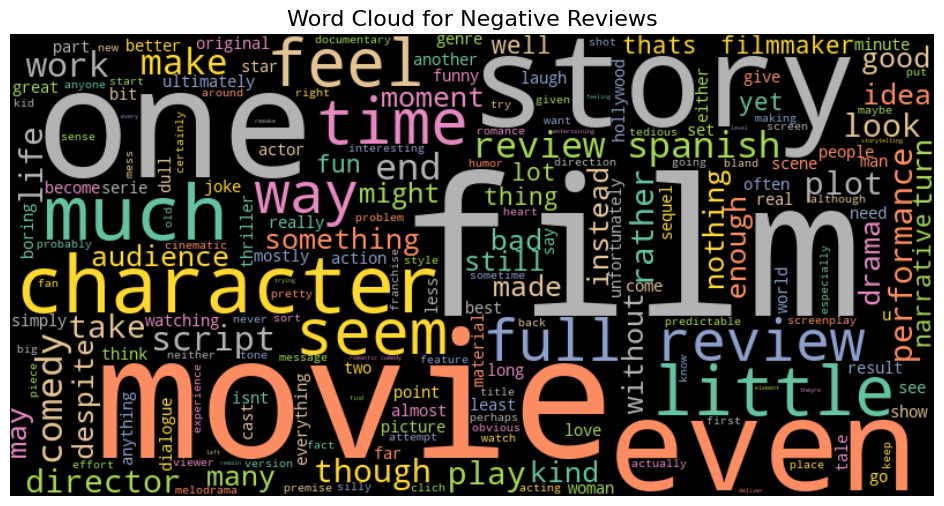

In [37]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['scoreSentiment'] == 'POSITIVE']['reviewText'])
negative_reviews = ' '.join(df[df['scoreSentiment'] == 'NEGATIVE']['reviewText'])

plt.figure(figsize=(12, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.show()

# SENTIMENT ANALYSIS USING MACHINE LEARNING

## SENTIMENT ANALYSIS USING COUNTVECTORIZER AND LOGISTIC REGRESSION

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.66      0.71     62906
    POSITIVE       0.84      0.90      0.87    125951

    accuracy                           0.82    188857
   macro avg       0.80      0.78      0.79    188857
weighted avg       0.81      0.82      0.81    188857



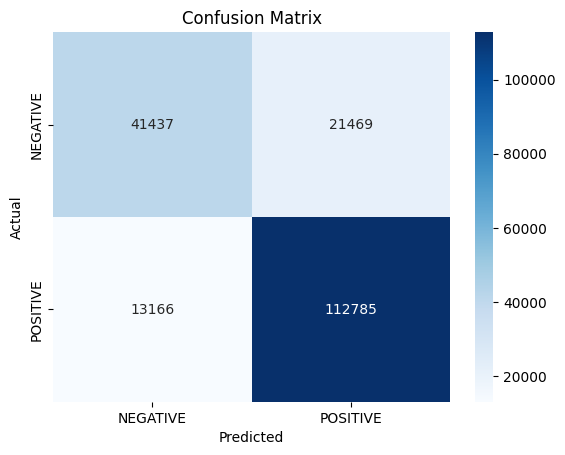

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df['reviewText']
y = df['scoreSentiment'].cat.codes 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

print(classification_report(y_test, y_pred, target_names=df['scoreSentiment'].cat.categories))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['scoreSentiment'].cat.categories, yticklabels=df['scoreSentiment'].cat.categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()